# Code
***

## Initial Imports
First we must import the models that we want to train.

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Data Pre-Processing
***
 We then must import the relevant libraries, and define the file paths for each of our csv files. Then, we can load the datasets, combine them, and print the result.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define file paths 
opel_corsa_01_path = './opel_corsa_01.csv'
opel_corsa_02_path = './opel_corsa_02.csv'
peugeot_207_01_path = './peugeot_207_01.csv'
peugeot_207_02_path = './peugeot_207_02.csv'

# Load the datasets
opel_corsa_01_df = pd.read_csv(opel_corsa_01_path, sep=';', decimal=',')
opel_corsa_02_df = pd.read_csv(opel_corsa_02_path, sep=';', decimal=',')
peugeot_207_01_df = pd.read_csv(peugeot_207_01_path, sep=';', decimal=',')
peugeot_207_02_df = pd.read_csv(peugeot_207_02_path, sep=';', decimal=',')

# Combine the datasets
combined_df = pd.concat([opel_corsa_01_df, opel_corsa_02_df, peugeot_207_01_df, peugeot_207_02_df], ignore_index=True)

# Print the combined dataset, and the first few rows with head
print (combined_df)

combined_df.head()


       Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
0              59           -2.2999878               25.67051888   
1              60           -2.0999756               24.09425926   
2              61                 -1.5               22.74317932   
3              62            0.1000366               22.29281998   
4              63  0.09997560000000001               23.64389992   
...           ...                  ...                       ...   
23770        4618                  1.0               28.79999924   
23771        4619   1.6999969480000001               30.59999847   
23772        4620   1.8000030519999999               29.69999886   
23773        4621          2.100006104               29.69999886   
23774        4622                  1.5               33.29999924   

      VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
0             13.22350089   121.59268970000001   -2.4769802000000003   
1             13.63891915          120.

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.2999878,25.67051888,13.22350089,121.59268970000001,-2.4769802000000003,0.3555,4.705882549,68,106,1796,15.81000042,24,-0.1133,19.49733543,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.0999756,24.09425926,13.63891915,120.4225707,-1.57625962,0.4492,10.58823586,68,103,1689,14.64999962,22,-0.1289,19.51572227,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.5,22.74317932,14.03104293,118.4567689,-1.35107994,0.4258,27.45098114,68,103,1599,11.85000038,21,-0.1328,19.44176483,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.1000366,22.29281998,14.17107305,117.5713084,-0.45035934,0.414,24.31372643,69,104,1620,12.21000004,20,-0.0859,19.38876915,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.09997560000000001,23.64389992,14.3289535,117.0741485,1.35107994,0.3945,20.0,69,104,1708,11.90999985,21,-0.0664,19.30163765,SmoothCondition,LowCongestionCondition,EvenPaceStyle


Next, we will continue with pre-processing the data by ensuring that missing values are dropped, and any unnamed columns are removed

In [4]:
# Drop rows with any missing value
combined_df.dropna(inplace=True)

# Drop the 'Unnamed: 0' column if it's not needed
if 'Unnamed: 0' in combined_df.columns:
    combined_df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop the variables we don't need
combined_df = combined_df.drop(['roadSurface', 'traffic'], axis=1)


# Check if there are any missing values
print("Number of missing values after dropping NA:", combined_df.isnull().sum().sum())

# Quick exploration of the target variable distribution
print(combined_df['drivingStyle'].value_counts())

Number of missing values after dropping NA: 0
drivingStyle
EvenPaceStyle      21003
AggressiveStyle     2759
Name: count, dtype: int64


Now, lets print a row example of a an even pace and aggressive driving style for visual context

In [5]:
# Map numeric codes to string labels and store in a new column
combined_df['drivingStyleLabel'] = combined_df['drivingStyle'].map({1: 'EvenPaceStyle', 0: 'AggressiveStyle'})

# Display examples using the new 'drivingStyleLabel' column for filtering
print("\nExample rows for different driving styles:")

even_pace_style_example = combined_df[combined_df['drivingStyleLabel'] == 'EvenPaceStyle'].head(1)
aggressive_style_example = combined_df[combined_df['drivingStyleLabel'] == 'AggressiveStyle'].head(1)

print("\nEven Pace Style example:")
display(even_pace_style_example)

print("\nAggressive Style example:")
display(aggressive_style_example)

# note: this may need to be specifically ran to update the table accordingly.



Example rows for different driving styles:

Even Pace Style example:


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle,drivingStyleLabel



Aggressive Style example:


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle,drivingStyleLabel


And lets print out the dataset shape

In [6]:
# Final data types check to confirm all features are retained and ready for model training
print("Final dataset shape:", combined_df.shape)
print("Data types after preprocessing and retaining all features:")
print(combined_df.dtypes)

Final dataset shape: (23762, 16)
Data types after preprocessing and retaining all features:
AltitudeVariation            object
VehicleSpeedInstantaneous    object
VehicleSpeedAverage          object
VehicleSpeedVariance         object
VehicleSpeedVariation        object
LongitudinalAcceleration     object
EngineLoad                   object
EngineCoolantTemperature     object
ManifoldAbsolutePressure     object
EngineRPM                    object
MassAirFlow                  object
IntakeAirTemperature         object
VerticalAcceleration         object
FuelConsumptionAverage       object
drivingStyle                 object
drivingStyleLabel            object
dtype: object


We can see that the datatypes are in an object state, we should convert the relevant numerical datatypes for our models to process better. We will also fill NaN values and check the data types.

In [7]:
# Convert numerical features from object to float64
numerical_columns = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
                     'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration',
                     'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure',
                     'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration',
                     'FuelConsumptionAverage']

for col in numerical_columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')  # Converts invalid parsing to NaN

# Forward fill NaN values
combined_df.fillna(method='ffill', inplace=True) 

# Re-check data types after conversion
print("\nUpdated Data types after conversion:")
print(combined_df.dtypes)


Updated Data types after conversion:
AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                    float64
MassAirFlow                  float64
IntakeAirTemperature         float64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
drivingStyle                  object
drivingStyleLabel            float64
dtype: object


C:\Users\ownie\AppData\Local\Temp\ipykernel_10556\2153296949.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In the pre-processing step, we have done the following:

- Loaded and combined multiple CSV files into a single DataFrame.
- Removed rows with missing values.
- Removed unnessecary columns.
- Converted relevant numeric columns to float64 for model compatibility.
- Applied forward fill to handle remaining NaN values.

***

## Data Labelling
***

First, let us encode the data, to ensure numeric variables

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode the drivingStyle variable
encoder = LabelEncoder()
combined_df['drivingStyle'] = encoder.fit_transform(combined_df['drivingStyle'])

Next, we can split the dataset, into training and testing sets, so we can train our model on one portion of data, and compare it against the test group to evaluate performance.

In [9]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(['drivingStyle', 'drivingStyleLabel'], axis=1)  # Features
y = combined_df['drivingStyle']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


And let us verify the encoded labels

In [10]:
# Verify the mapping of encoded labels
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label encoding mapping for 'drivingStyle':", label_mapping)

Label encoding mapping for 'drivingStyle': {'AggressiveStyle': 0, 'EvenPaceStyle': 1}


We then will perform a stratified split, so we can ensure the training and test sets have relevant similar distributions.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

And finally we can then print out the distributions to confirm they are as we expect.

In [12]:
# Calculate the percentage of each class in the original dataset
original_distribution = y.value_counts(normalize=True) * 100

# Calculate the percentage of each class in the training set
train_distribution = y_train.value_counts(normalize=True) * 100

# Calculate the percentage of each class in the test set
test_distribution = y_test.value_counts(normalize=True) * 100

# Print the distributions
print("Original Dataset Distribution:\n", original_distribution)
print("\nTraining Set Distribution:\n", train_distribution)
print("\nTest Set Distribution:\n", test_distribution)


Original Dataset Distribution:
 drivingStyle
1    88.389024
0    11.610976
Name: proportion, dtype: float64

Training Set Distribution:
 drivingStyle
1    88.390549
0    11.609451
Name: proportion, dtype: float64

Test Set Distribution:
 drivingStyle
1    88.385468
0    11.614532
Name: proportion, dtype: float64


***
## Data Scaling
***

To scale our data, lets initialize the scaler from sklearn, and then compute the mean and standard deviation, by applying the scaler to the columns of our training and test data.

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


We have scaled the data, so lets now verify our changes. We expect a value close to 0 and a standard deviation close to 1.

In [14]:
# Calculate the mean and std dev of the scaled features in the training set
scaled_means = X_train[numerical_columns].mean()
scaled_stds = X_train[numerical_columns].std()

# Print the means and standard deviations
print("Mean of scaled features:\n", scaled_means)
print("\nStandard Deviation of scaled features:\n", scaled_stds)


Mean of scaled features:
 AltitudeVariation           -3.396149e-17
VehicleSpeedInstantaneous   -1.371275e-16
VehicleSpeedAverage         -9.398148e-17
VehicleSpeedVariance        -5.030145e-17
VehicleSpeedVariation        2.349537e-18
LongitudinalAcceleration    -3.310711e-18
EngineLoad                   6.365110e-17
EngineCoolantTemperature     3.417508e-16
ManifoldAbsolutePressure     2.041961e-16
EngineRPM                   -1.947980e-16
MassAirFlow                 -3.041583e-16
IntakeAirTemperature        -9.120476e-17
VerticalAcceleration         2.776726e-17
FuelConsumptionAverage      -8.351536e-17
dtype: float64

Standard Deviation of scaled features:
 AltitudeVariation            1.00003
VehicleSpeedInstantaneous    1.00003
VehicleSpeedAverage          1.00003
VehicleSpeedVariance         1.00003
VehicleSpeedVariation        1.00003
LongitudinalAcceleration     1.00003
EngineLoad                   1.00003
EngineCoolantTemperature     1.00003
ManifoldAbsolutePressure     1.000

And finally, lets plot some of the data on histograms to confirm that our features are scaling as we expect. 

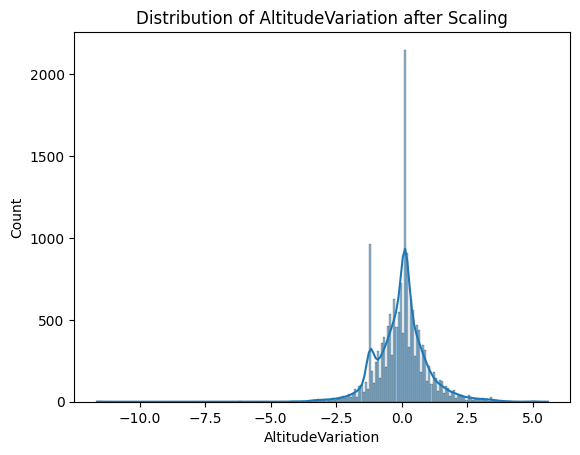

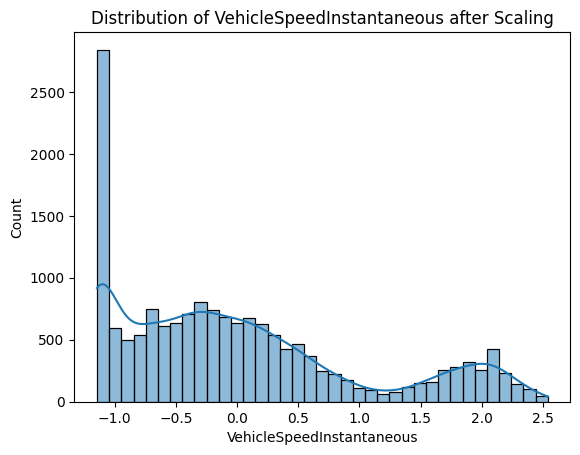

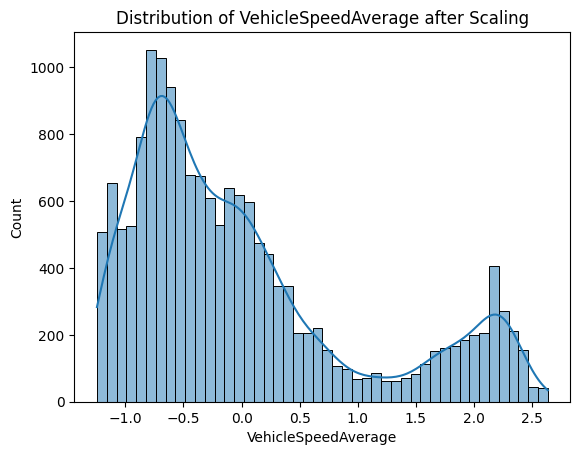

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for a subset of some of the scaled features
for col in numerical_columns[:3]:  
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col} after Scaling')
    plt.show()


***
## Data Analysis and Visualization
***

Before we train the models, lets analyze and visualize the data we have covered above. 

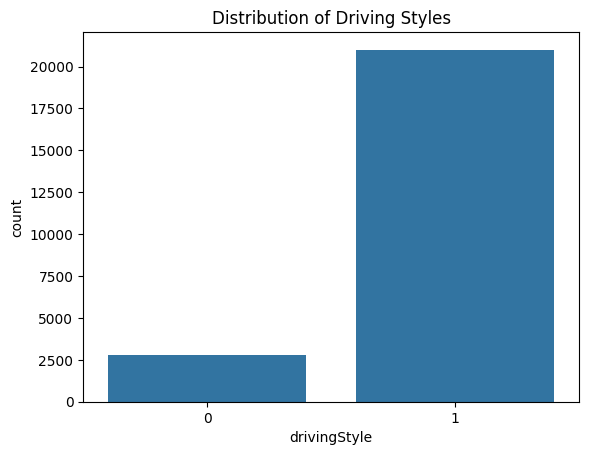

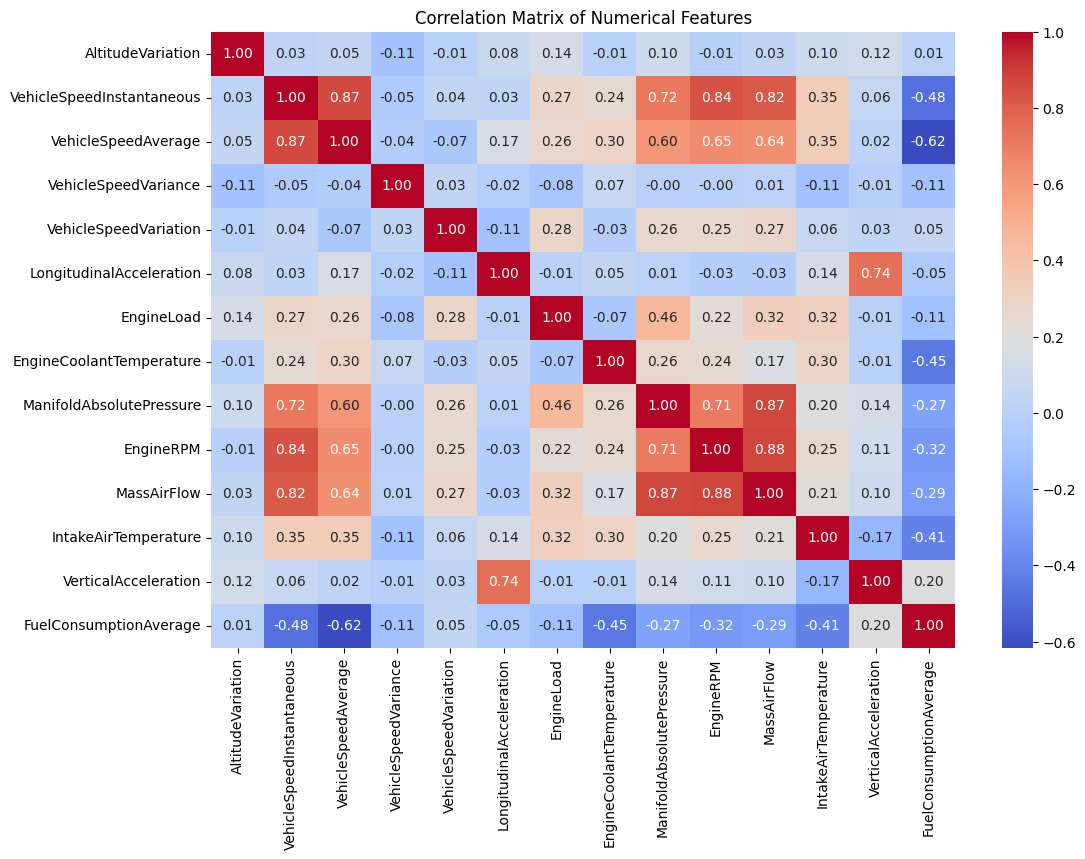

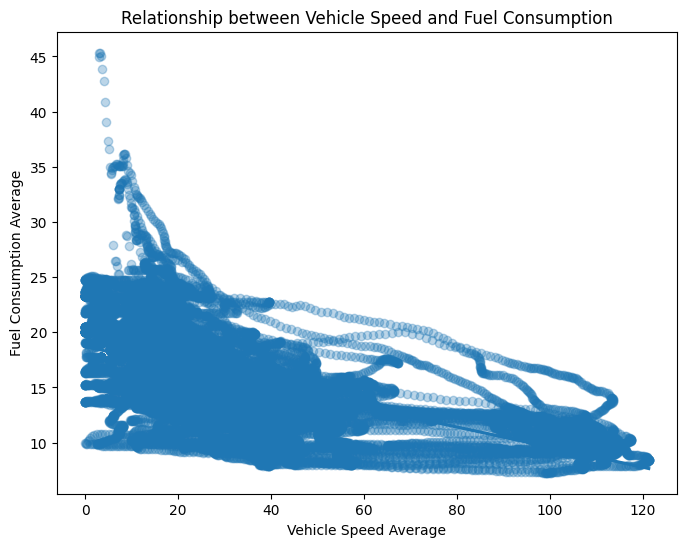

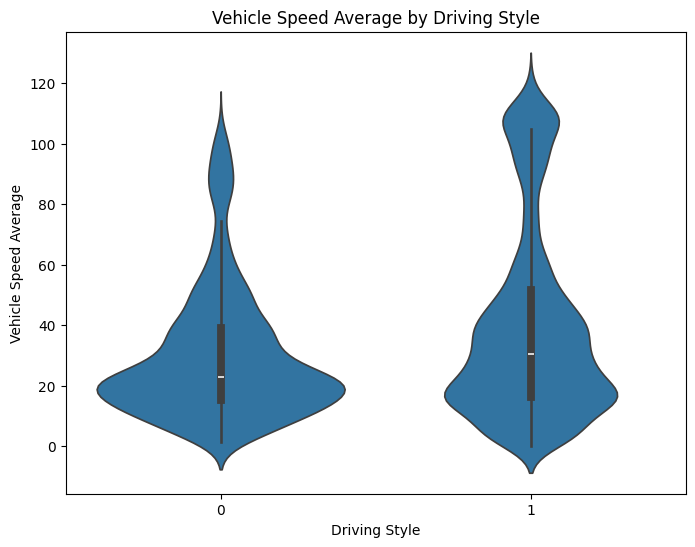

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the distribution of the 'drivingStyle' classes
sns.countplot(x='drivingStyle', data=combined_df)
plt.title('Distribution of Driving Styles')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = combined_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Scatter plot with regression line for two features 
plt.figure(figsize=(8, 6))
sns.regplot(x='VehicleSpeedAverage', y='FuelConsumptionAverage', data=combined_df, scatter_kws={'alpha':0.3}) #these values can be changed (x,y) to see other features
plt.title('Relationship between Vehicle Speed and Fuel Consumption')
plt.xlabel('Vehicle Speed Average')
plt.ylabel('Fuel Consumption Average')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(x='drivingStyle', y='VehicleSpeedAverage', data=combined_df)
plt.title('Vehicle Speed Average by Driving Style')
plt.xlabel('Driving Style')
plt.ylabel('Vehicle Speed Average')
plt.show()



# Training the Models

## Logistic Regression
***

In [28]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced')

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = log_reg.predict(X_train)

# Predict on the test set
y_test_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

print("\nLogistic Regression Testing Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))


Logistic Regression Training Metrics:
Accuracy: 0.6850838694162208
Precision: 0.9536912751677852
Recall: 0.6765746156985444
F1 Score: 0.7915804551965622

Logistic Regression Testing Metrics:
Accuracy: 0.6930845840931407
Precision: 0.9573048699132756
Recall: 0.6832248849388985
F1 Score: 0.7973698833117244


***
## Support Vector Classifier (SVC)
***

In [29]:
# Initialize the Support Vector Classifier
svc = SVC(class_weight='balanced')

# Train the model
svc.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svc = svc.predict(X_test)

# Evaluate the model
print("\nSupport Vector Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_svc))
print("Precision:", precision_score(y_test, y_test_pred_svc))
print("Recall:", recall_score(y_test, y_test_pred_svc))
print("F1 Score:", f1_score(y_test, y_test_pred_svc))



Support Vector Classifier Metrics:
Accuracy: 0.7954832374807126
Precision: 0.9737820387399726
Recall: 0.7898746230757022
F1 Score: 0.8722397476340694


***
## k-Nearest Neighbours (kNN)
***

In [32]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic samples of the minority class
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Initialize the k-Nearest Neighbors classifier with n_neighbors=3 as an example
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_test_pred_knn = knn.predict(X_test)

# Evaluate the model
print("\nk-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print("Precision:", precision_score(y_test, y_test_pred_knn))
print("Recall:", recall_score(y_test, y_test_pred_knn))
print("F1 Score:", f1_score(y_test, y_test_pred_knn))



k-Nearest Neighbors Metrics:
Accuracy: 0.9123299200448871
Precision: 0.9247231367853936
Recall: 0.9806379939692113
F1 Score: 0.9518601247785565


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_knn))


ValueError: Found input variables with inconsistent numbers of samples: [7129, 16633]